In [1]:
import nltk
import numpy as py
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

import re
import numpy as np
import pandas as pd
from pprint import pprint

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from collections import Counter
from gensim.test.utils import datapath
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import export_text
import graphviz 

In [2]:
def retrieve_feature_label(path):
    df = pd.read_pickle(path)
    return df['total_notes'], df['label']
X, Y = retrieve_feature_label("train.pickle")
lda_model = gensim.models.ldamodel.LdaModel.load('lda.model')
with open("corpus.txt", "rb") as fp:   # Unpickling
    corpus = pickle.load(fp)
predicted_labels = lda_model.get_document_topics(corpus)

In [3]:
pprint(lda_model.print_topics())

[(0,
  '0.071*"work" + 0.067*"also" + 0.043*"get" + 0.040*"take" + 0.040*"week" + '
  '0.032*"need" + 0.031*"next" + 0.029*"schedule" + 0.029*"give" + '
  '0.027*"set"'),
 (1,
  '0.082*"program" + 0.049*"state" + 0.036*"inform" + 0.032*"make" + '
  '0.028*"want" + 0.028*"mom" + 0.028*"wa" + 0.027*"day" + 0.026*"able" + '
  '0.026*"talk"'),
 (2,
  '0.102*"sign" + 0.093*"bring" + 0.065*"discharge" + 0.046*"release" + '
  '0.035*"goal" + 0.031*"foster" + 0.030*"worker" + 0.030*"form" + '
  '0.030*"remain" + 0.028*"transition"'),
 (3,
  '0.066*"mother" + 0.065*"time" + 0.052*"client" + 0.049*"discuss" + '
  '0.034*"good" + 0.033*"continue" + 0.032*"plan" + 0.023*"email" + '
  '0.023*"regard" + 0.021*"place"'),
 (4,
  '0.084*"case" + 0.071*"phone" + 0.059*"receive" + 0.057*"court" + '
  '0.053*"date" + 0.047*"send" + 0.044*"update" + 0.032*"charge" + 0.031*"new" '
  '+ 0.030*"weekend"'),
 (5,
  '0.167*"school" + 0.068*"pick" + 0.061*"transport" + 0.051*"complete" + '
  '0.045*"assessment" +

In [42]:
new_label = []
prob = []
for i in predicted_labels:
    label,probability = max(i, key=lambda x:x[1])
    new_label.append(label)
    prob.append(probability)
new_label = np.array(new_label)

In [45]:
z = [0] * len(new_label)
pd_new = pd.DataFrame({'new':new_label,"z":z})
pd_new.columns = ['new','z']
pd_new_stat = pd_new.groupby("new").count()
print(pd_new_stat)

         z
new       
0    38944
1    68582
2     1280
3    14385
4    17487
5     5639


In [44]:
new_label[new_label ==4] = 2
new_label[new_label ==5] = 2
new_label[new_label ==6] = 2
new_label[new_label ==7] = 2
new_label[new_label ==8] = 4
new_label[new_label ==9] = 5

In [46]:
file = pd.read_pickle("train.pickle")
for i in range(file.shape[0]):
    if file.iloc[i,19] != file.iloc[i,19]:
        file.iloc[i,19] = file.iloc[i,16]
file_stat = file[['WHO_WAS_CONTACTED','STAFF','WHY']].groupby(["STAFF"]).indices

In [47]:
print(file.iloc[0,:])

Unnamed: 0                                                                   0
MID                                                                     346868
FirstCommit_2                                                       2009-12-01
DischargeDate_2                                                     2016-07-05
CommitDays                                                                2408
monthsofstay                                                           79.2105
cnpermnth                                                              0.16412
numcasenote                                                                 13
numcaseworkers                                                               1
numcasenoteCW                                                               13
Treatment                                                            Treatment
YES                                                                          0
YESStartDate_2                                      

In [276]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
MID = file['MID'].to_numpy()
MID = MID.astype(str)
MID = le.fit_transform(MID)
YES = file['YES'].to_numpy()
YES = le.fit_transform(YES)
CaseworkeratDischargeDate = file['CaseworkeratDischargeDate'].to_numpy()
CaseworkeratDischargeDate[CaseworkeratDischargeDate != CaseworkeratDischargeDate] = ""
CaseworkeratDischargeDate = le.fit_transform(CaseworkeratDischargeDate)
CONTACT_TYPE = file['CONTACT_TYPE'].to_numpy()
CONTACT_TYPE[CONTACT_TYPE!=CONTACT_TYPE] = ""
CONTACT_TYPE = le.fit_transform(CONTACT_TYPE)
Staffing = file['Staffing'].to_numpy()
Staffing[Staffing!=Staffing] = ""
Staffing = le.fit_transform(Staffing)
HOW_WAS_CONTACT_MADE = file['HOW_WAS_CONTACT_MADE'].to_numpy()
HOW_WAS_CONTACT_MADE[HOW_WAS_CONTACT_MADE !=HOW_WAS_CONTACT_MADE] = ""
HOW_WAS_CONTACT_MADE = le.fit_transform(HOW_WAS_CONTACT_MADE)
WHY = file['WHY'].to_numpy()
WHY[WHY!=WHY] = ""
WHY = le.fit_transform(WHY)
STAFF = file['STAFF'].to_numpy()
STAFF[STAFF!=STAFF] = ""
STAFF = le.fit_transform(STAFF)
CommitDays = file['CommitDays'].to_numpy()
CommitDays[CommitDays!=CommitDays] = 0
numcasenote = file['numcasenote'].to_numpy()
numcasenote[numcasenote != numcasenote] = 0
numcaseworkers = file['numcaseworkers'].to_numpy()
numcaseworkers[numcaseworkers != numcaseworkers] = 0
numcasenoteCW = file['numcasenoteCW'].to_numpy()
numcasenoteCW[numcasenoteCW != numcasenoteCW] = 0

FirstCommit_2 = file['FirstCommit_2'].to_numpy()
FirstCommit_2[FirstCommit_2!=FirstCommit_2] = ""
FirstCommit_2 = FirstCommit_2.astype(str)
FirstCommit_2 = le.fit_transform(FirstCommit_2)

DischargeDate_2 = file['DischargeDate_2'].to_numpy()
DischargeDate_2[DischargeDate_2!=DischargeDate_2] = ""
DischargeDate_2 = DischargeDate_2.astype(str)
DischargeDate_2 = le.fit_transform(DischargeDate_2)


WHO_WAS_CONTACTED = file['WHO_WAS_CONTACTED'].to_numpy()
WHO_WAS_CONTACTED[WHO_WAS_CONTACTED!=WHO_WAS_CONTACTED] = ""
WHO_WAS_CONTACTED = WHO_WAS_CONTACTED.astype(str)
WHO_WAS_CONTACTED = le.fit_transform(WHO_WAS_CONTACTED)
new_data = pd.DataFrame({"CommitDays":CommitDays, 
                        "CONTACT_TYPE":CONTACT_TYPE,
                         "WHO_WAS_CONTACTED":WHO_WAS_CONTACTED,
                         "WHY":WHY
                        })

In [265]:
print(max(CONTACT_TYPE),max(WHY),max(WHO_WAS_CONTACTED))

25 7097 215


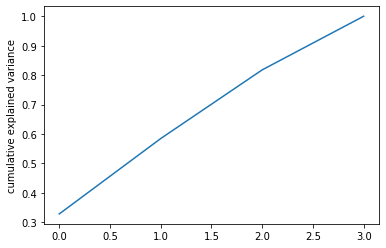

In [277]:
pca = PCA()
X = StandardScaler().fit_transform(new_data)
clf = pca.fit(X)
ex = -np.sort(-pca.explained_variance_ratio_)
plt.plot(np.array([i for i in range(4)]),np.cumsum(ex))
plt.ylabel('cumulative explained variance')
plt.show()

In [278]:
new_data.iloc[0,:]

CommitDays           2408.0
CONTACT_TYPE            6.0
WHO_WAS_CONTACTED     114.0
WHY                  5181.0
Name: 0, dtype: float64

In [288]:
clf = tree.DecisionTreeClassifier(max_depth = 10)
clf = clf.fit(new_data.to_numpy(), new_label)
#tree.plot_tree(clf) 

In [289]:
clf.score(new_data.to_numpy(), new_label)

0.49583438698169047

In [290]:
r = export_text(clf, 
                feature_names=["CommitDays",
                               "CONTACT_TYPE","WHO_WAS_CONTACTED","WHY"])

In [291]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=["CommitDays",
                               "CONTACT_TYPE","WHO_WAS_CONTACTED","WHY"],
                      filled=True, rounded=True,
                                class_names = ['0','1','2','3','4','5'],
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decisiontree_result3.dot")

'decisiontree_result3.dot.pdf'

In [282]:
#
print(type(r))
text_file = open("DT_result3.txt", "w")
n = text_file.write(r)
text_file.close()

<class 'str'>


In [229]:
print(clf.get_n_leaves())
print(clf.get_depth())

46874
50


In [230]:
path = clf.cost_complexity_pruning_path(new_data.to_numpy(), new_label)

Text(0, 0.5, 'total impurity of leaves')

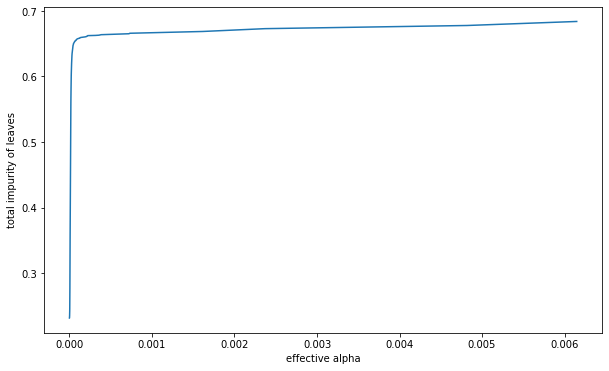

In [231]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")

In [232]:
ccp_alphas = ccp_alphas[ (ccp_alphas >= 0.0002) & (ccp_alphas <= 0.1) ]
print(len(ccp_alphas))

18


In [233]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(new_data.to_numpy(), new_label)
    clfs.append(clf)
    print("done")
    

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


Text(0, 0.5, 'total depth')

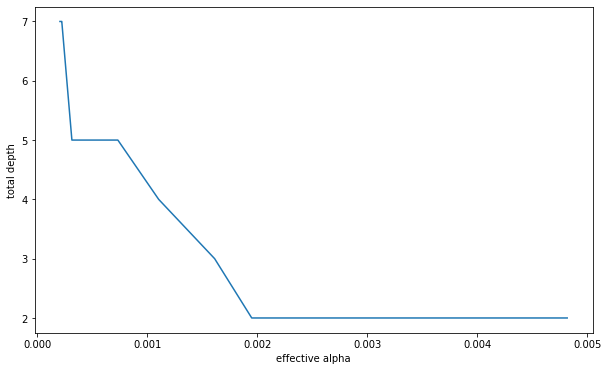

In [236]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0, 0.5, 'Accuracy scores')

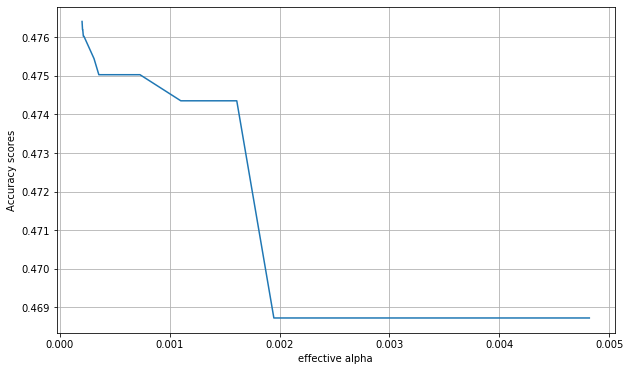

In [237]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(new_label, clf.predict(new_data.to_numpy())) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")